## 1. Libraries + Settings

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

## 2. Load dataset

In [90]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}', end='\n\n')
df.head()

Number of rows: 299
Number of columns: 13



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##### Let's see how many death events happend in dataset

0    203
1     96
Name: DEATH_EVENT, dtype: int64


Text(0, 0.5, '')

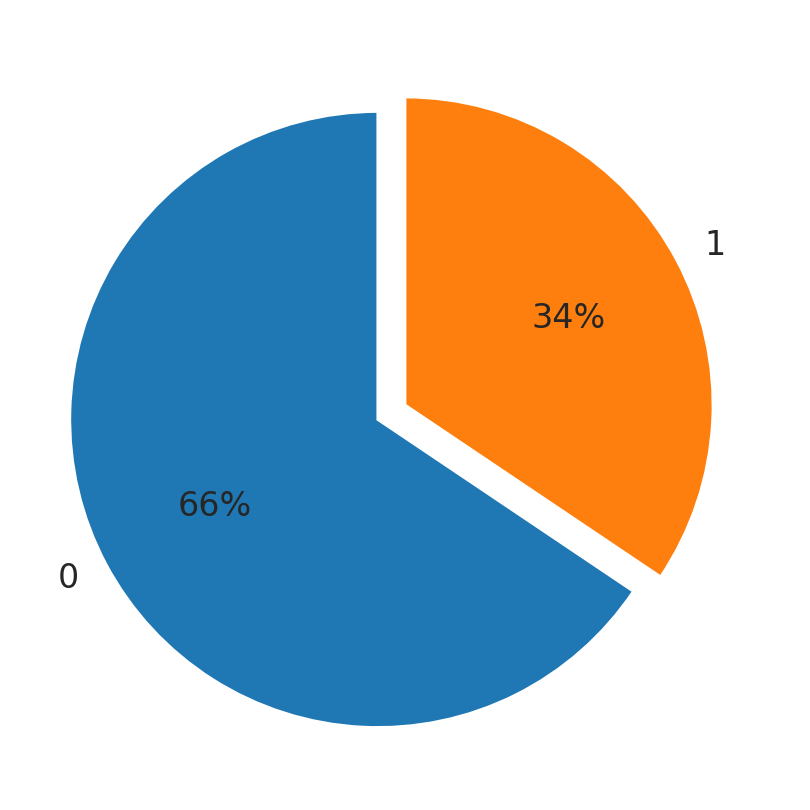

In [91]:
print(df['DEATH_EVENT'].value_counts())
df.groupby('DEATH_EVENT').sum()['age'].plot(kind='pie', autopct='%1.0f%%',
                                                  explode=(0.1,0),
                                                  startangle=90).set_ylabel('')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Are there any missing values?

In [93]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

We are all good!

## 2. Exploration analyse

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


#### Age distribution

[Text(0.5, 1.0, 'Age distribution')]

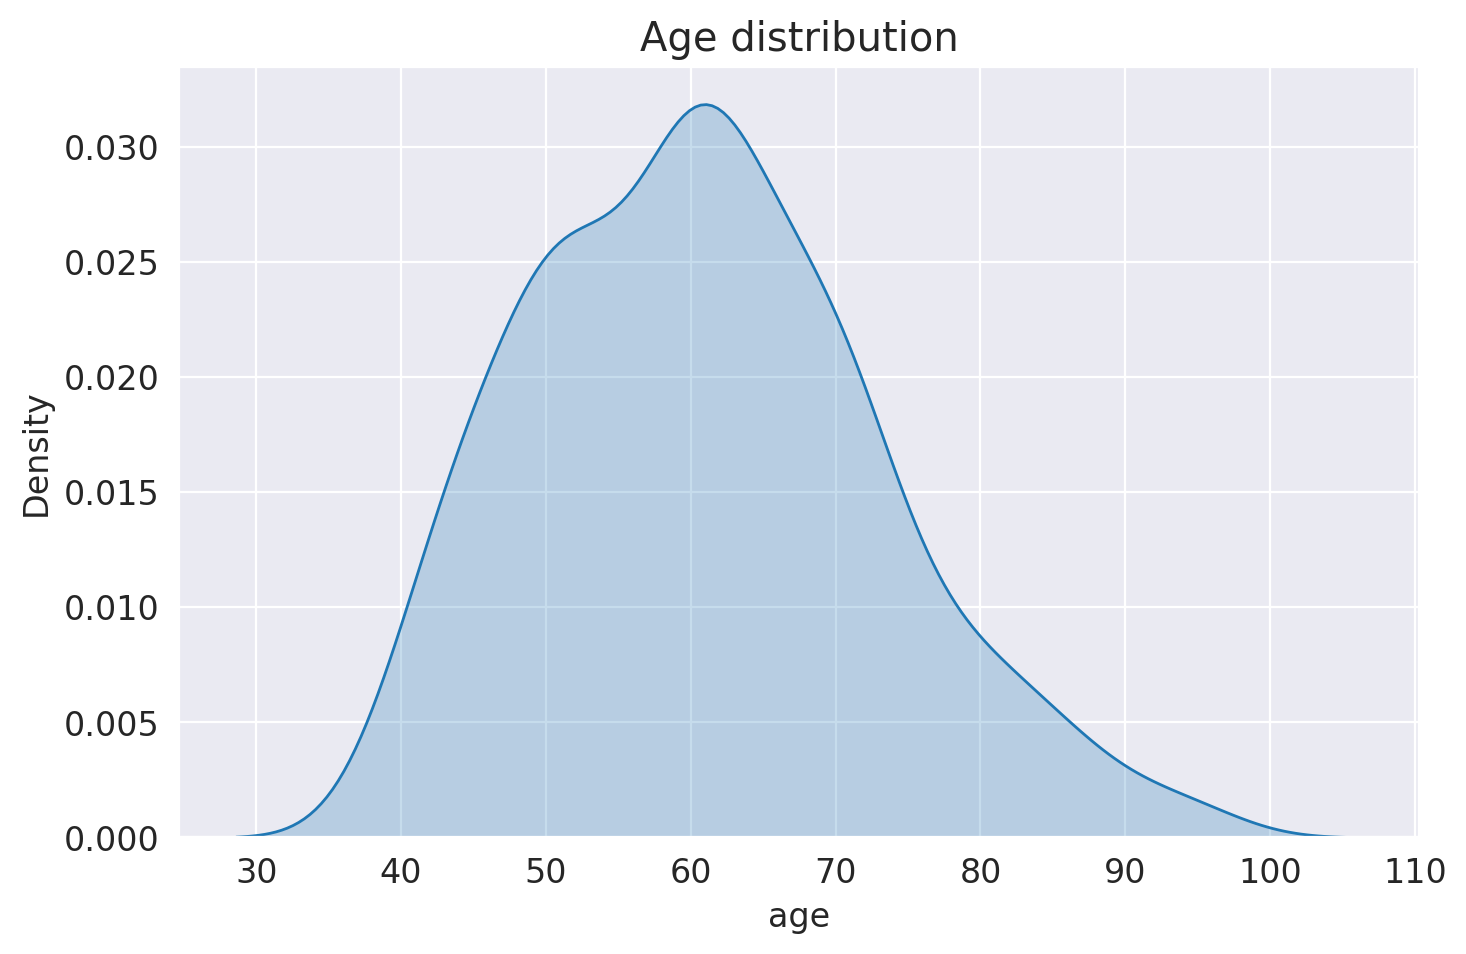

In [95]:
sns.kdeplot(data=df, x='age', fill=True).set(title='Age distribution')

Average age: 60.83 years


<Axes: xlabel='age'>

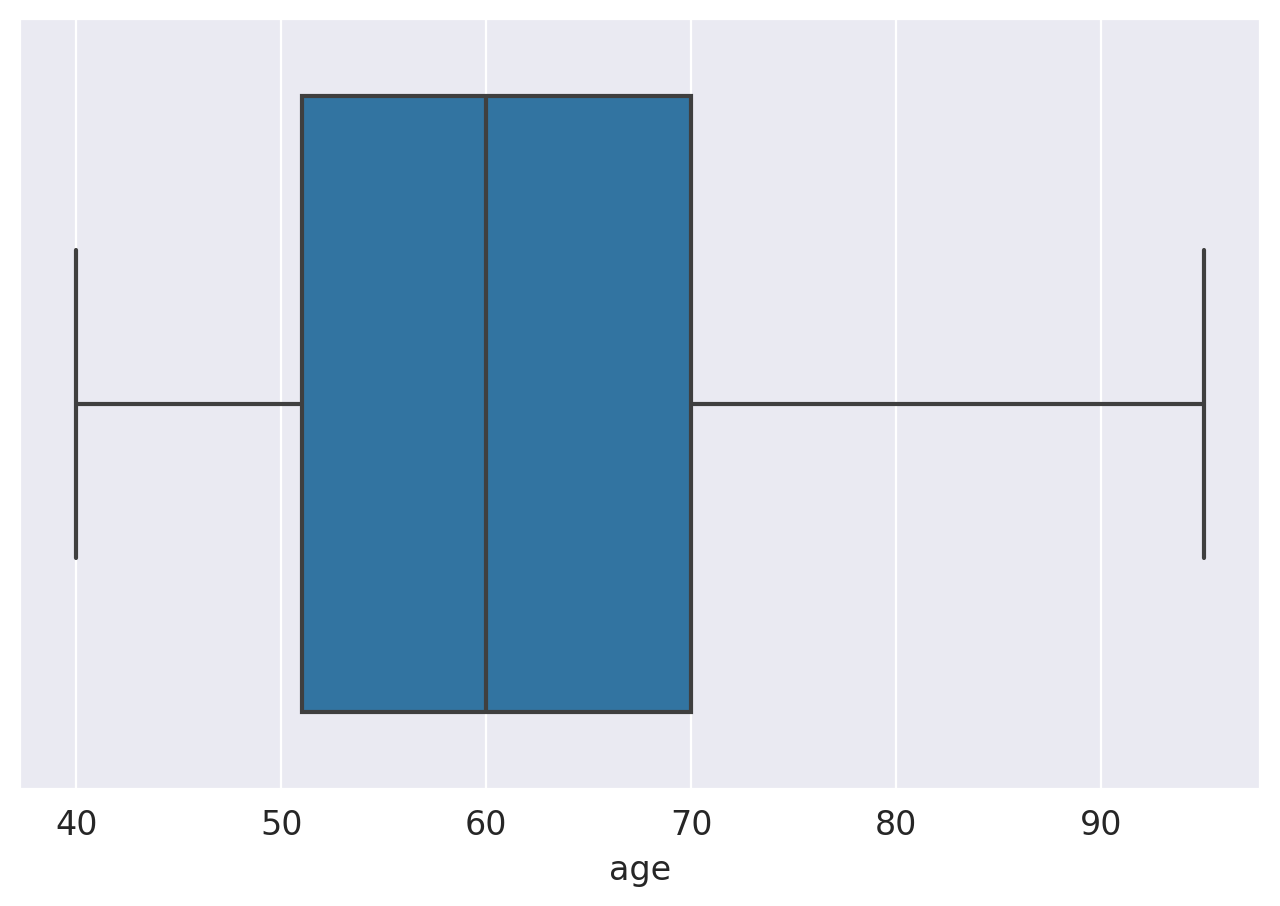

In [96]:
print('Average age:', round(df['age'].mean(), 2), 'years')
sns.boxplot(data=df, x = 'age')

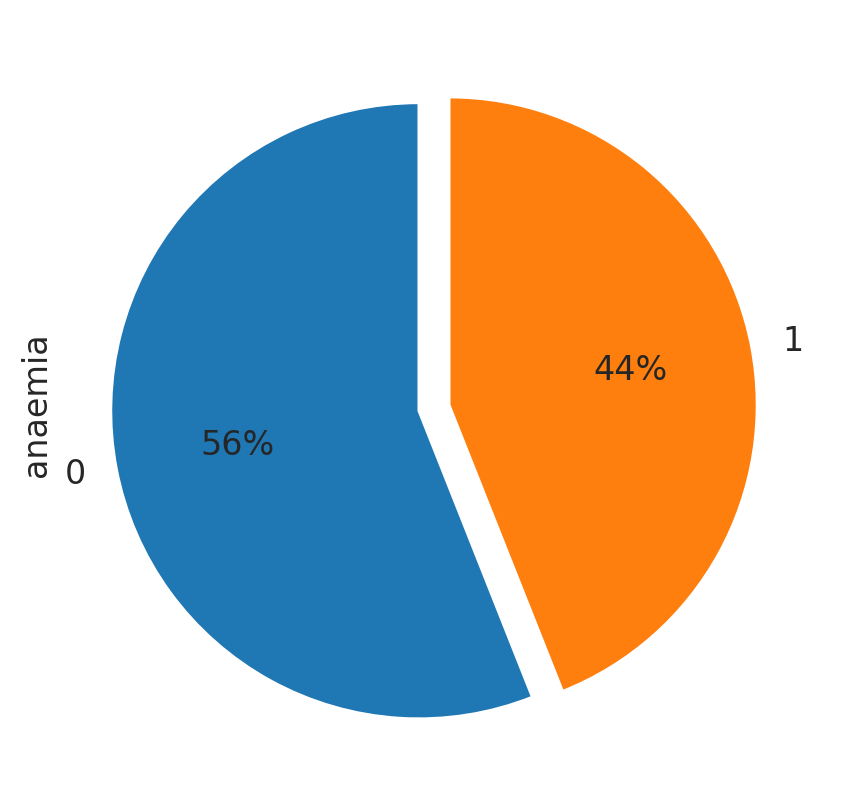

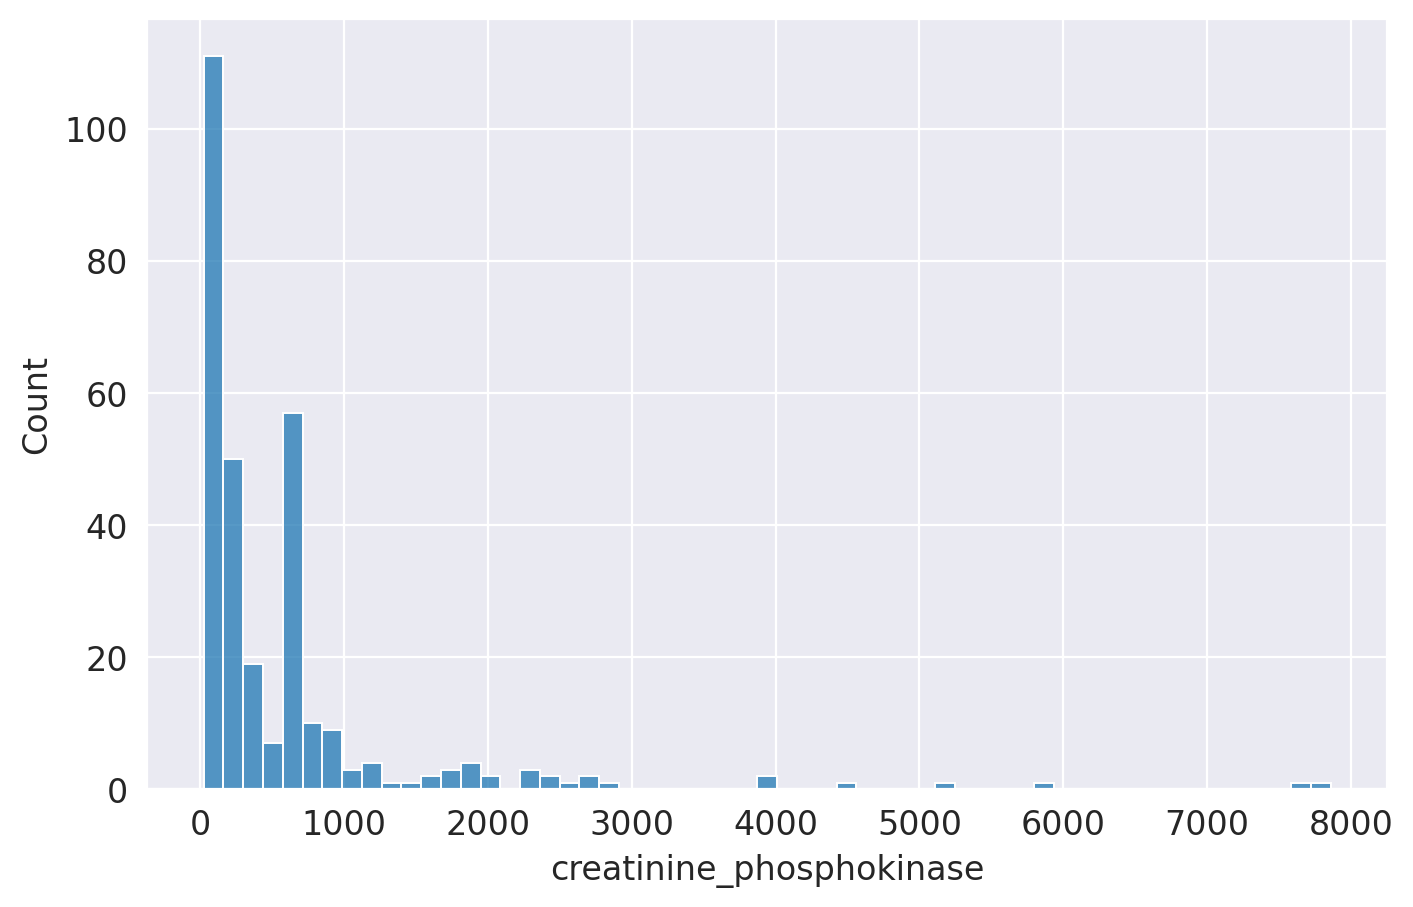

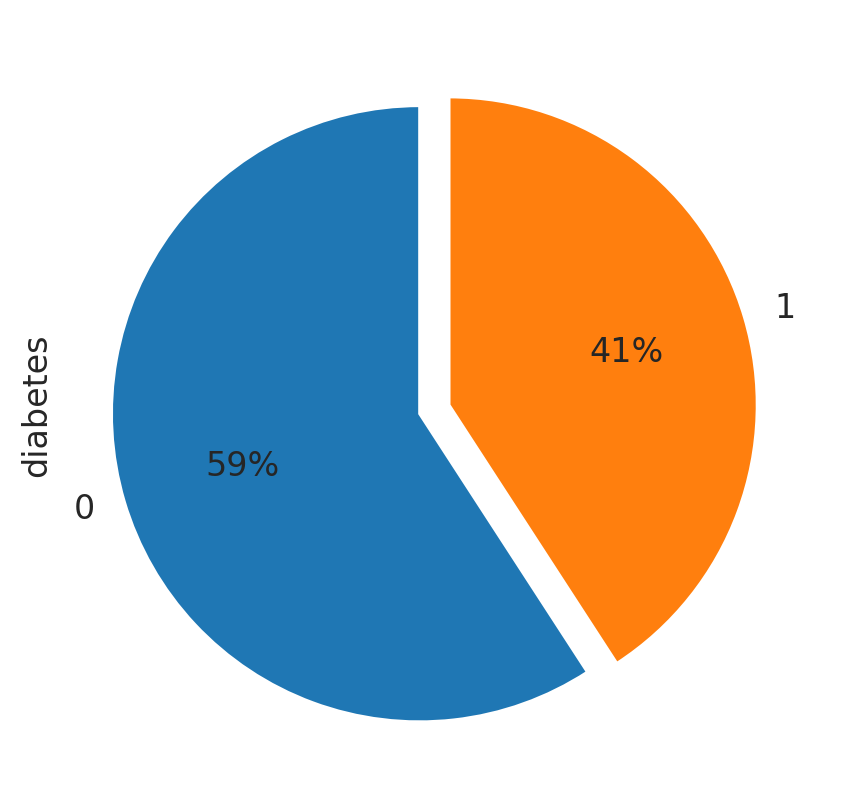

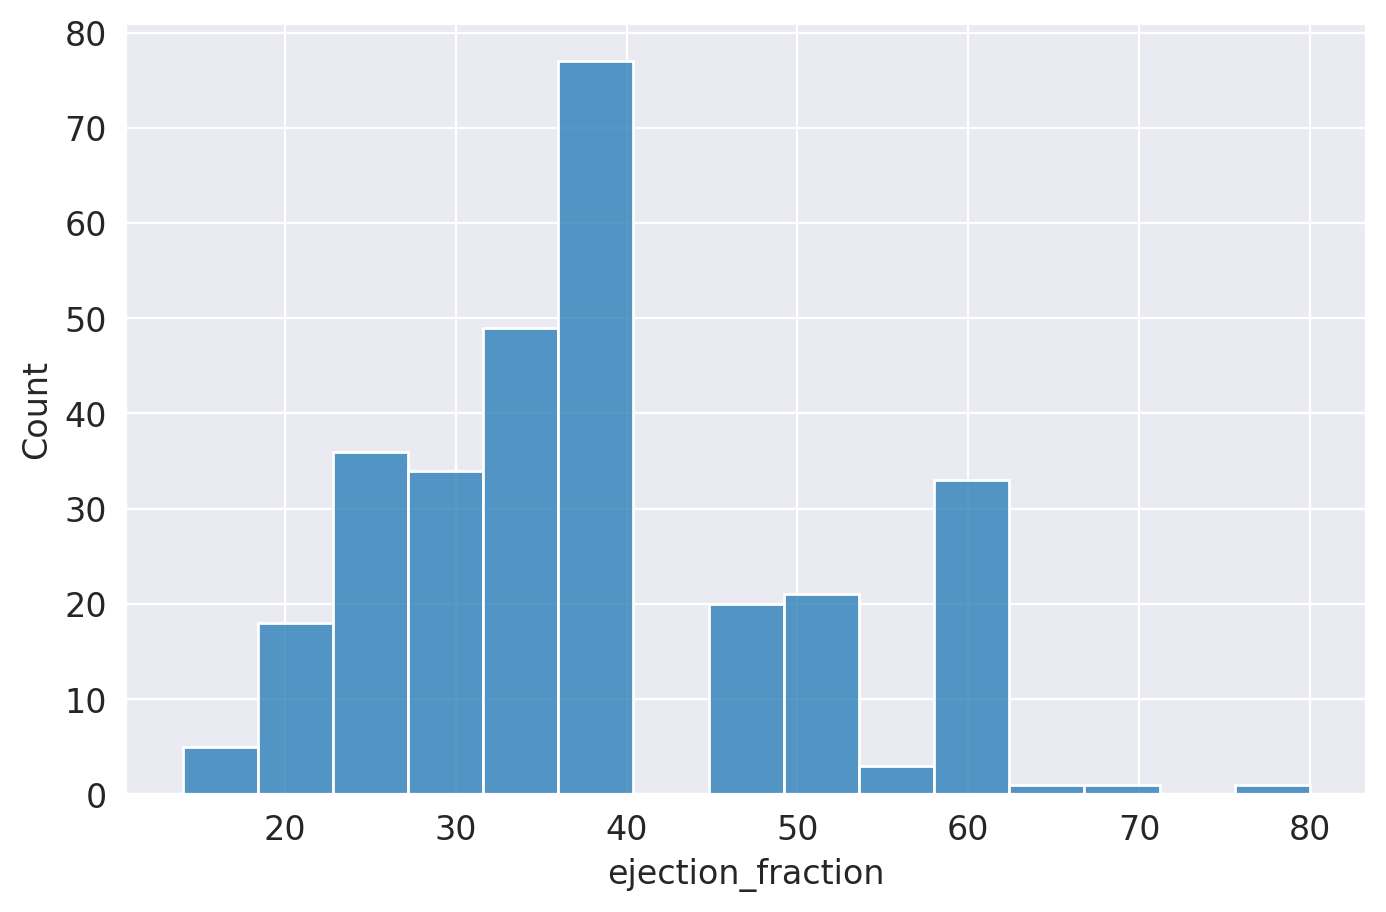

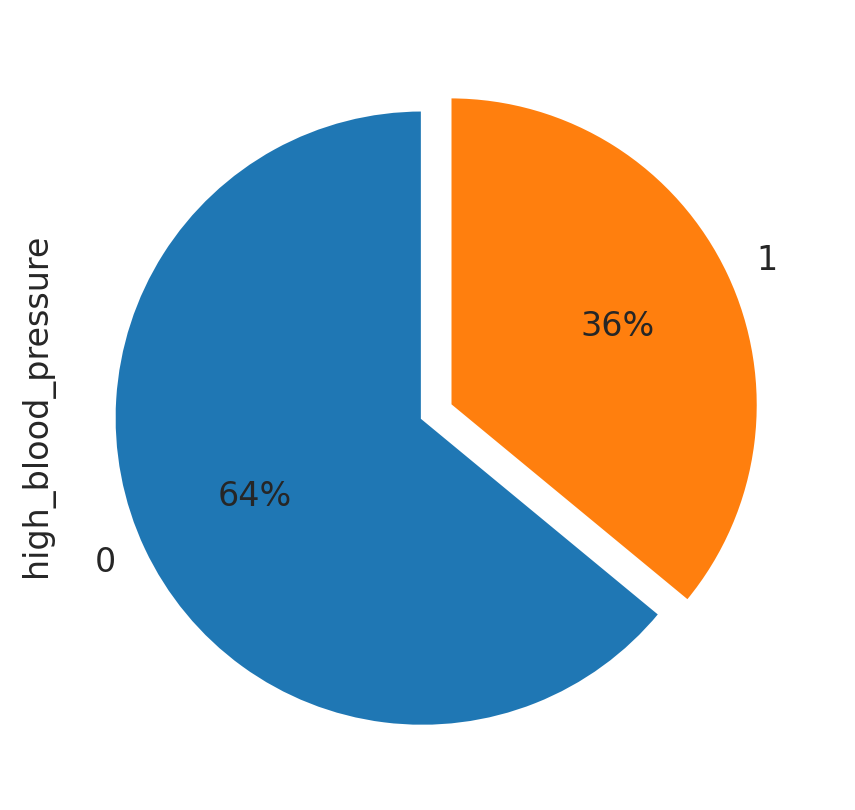

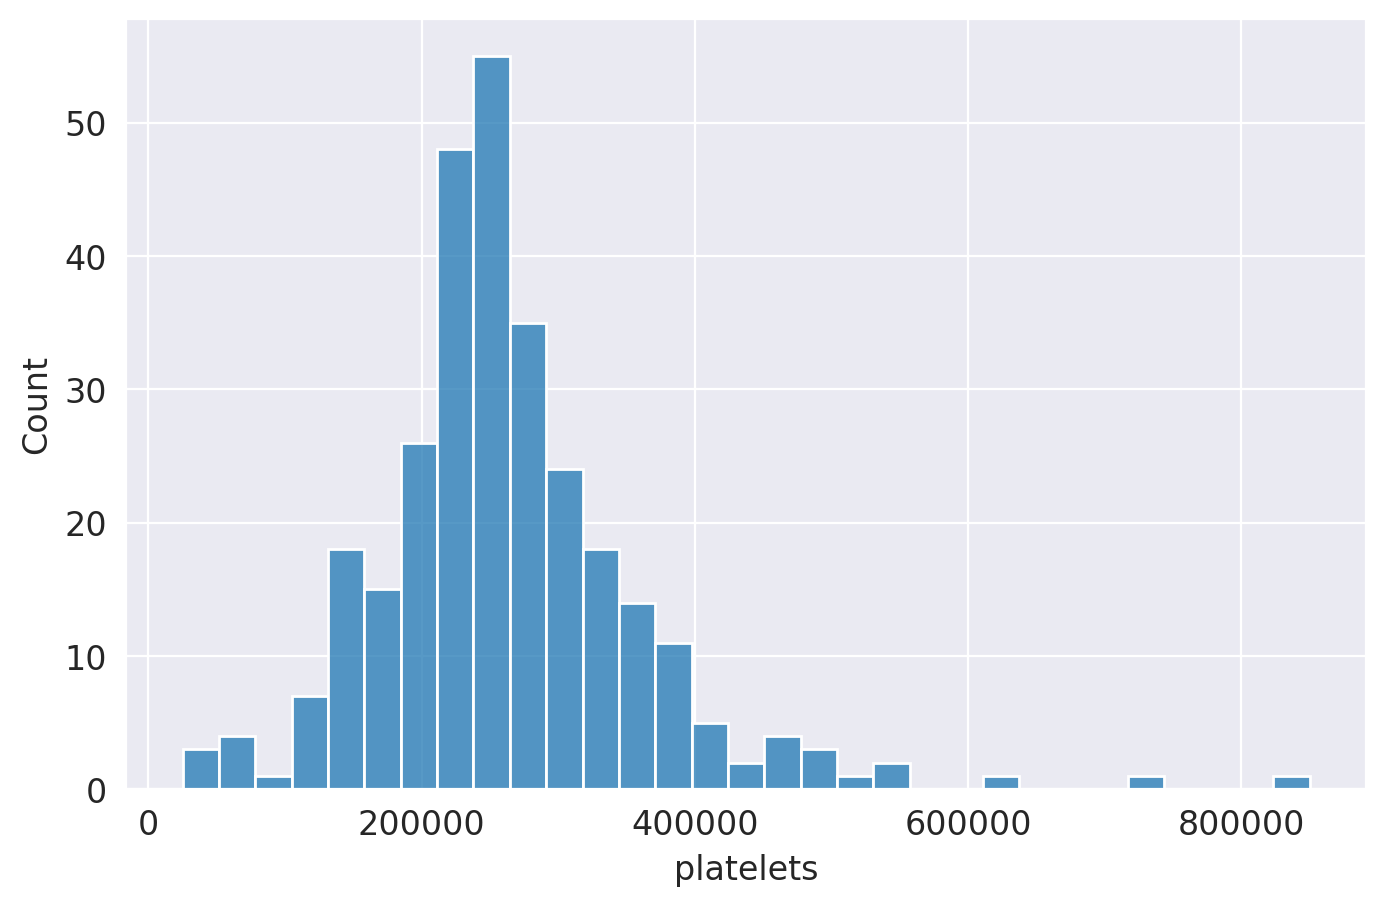

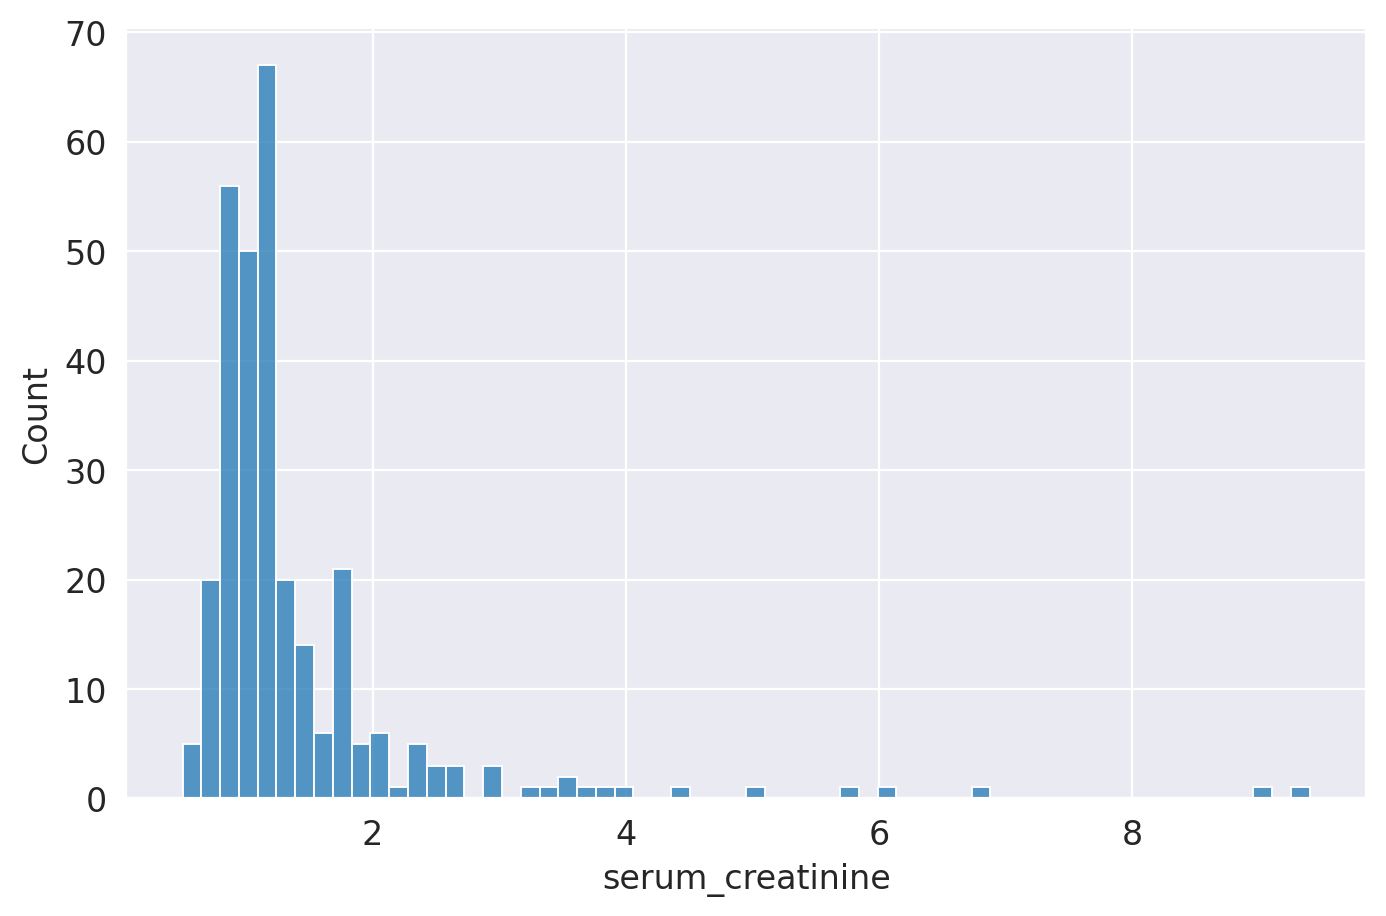

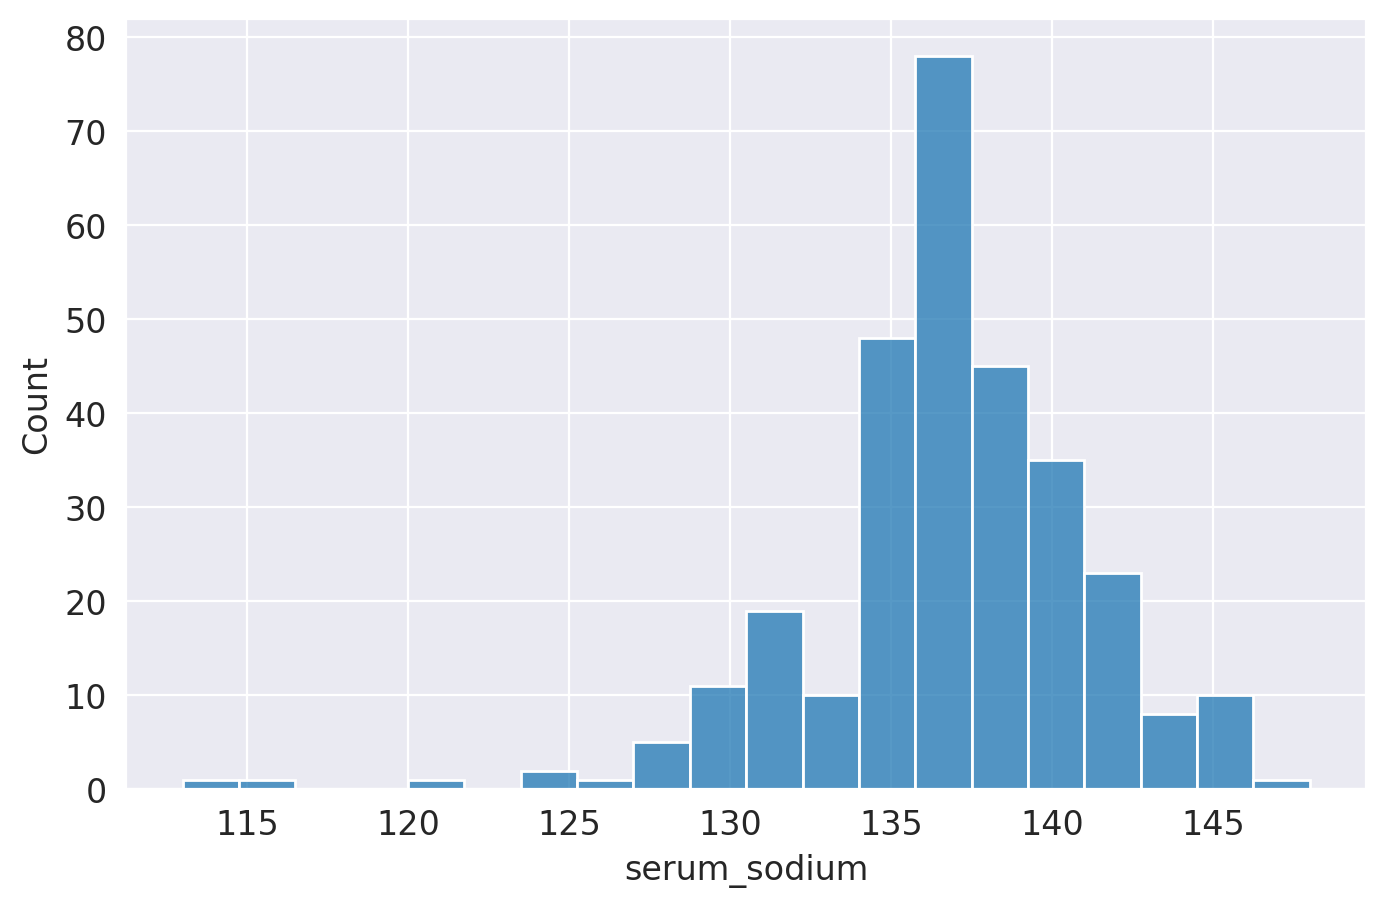

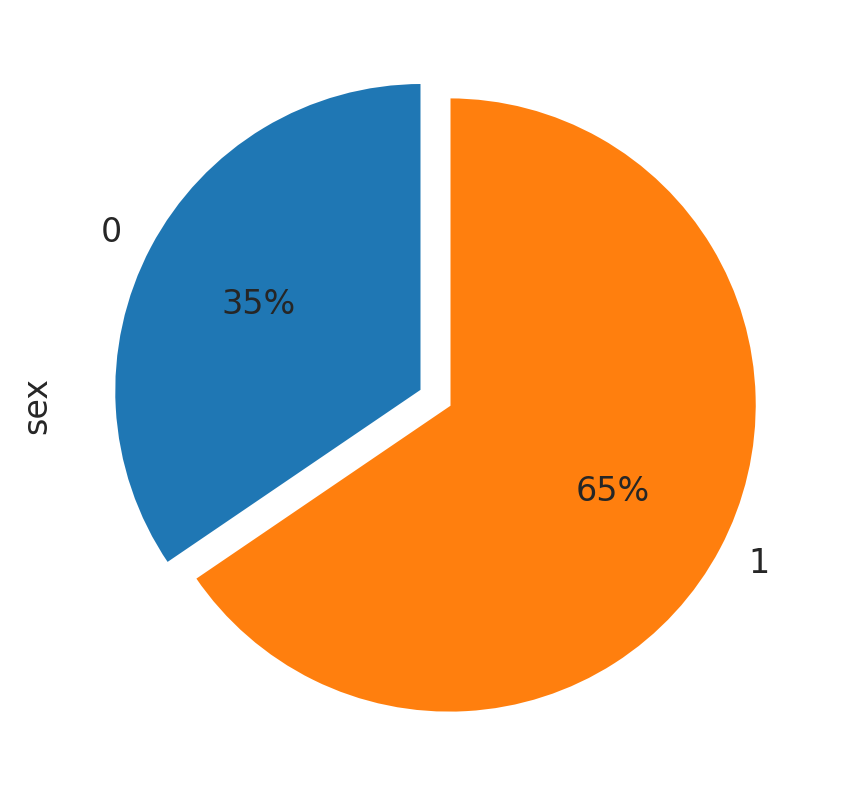

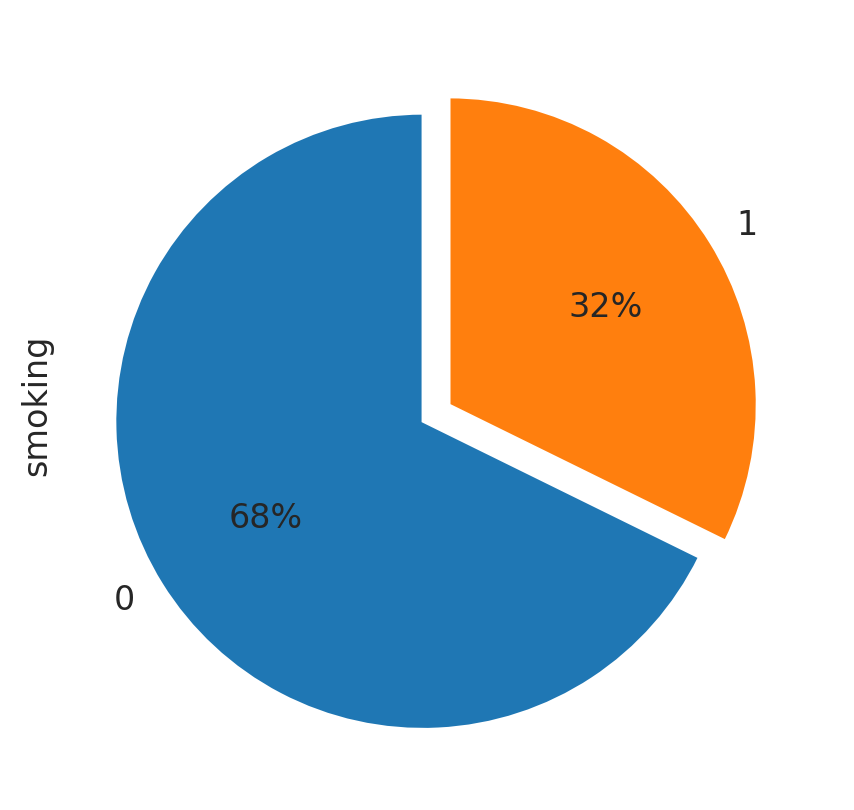

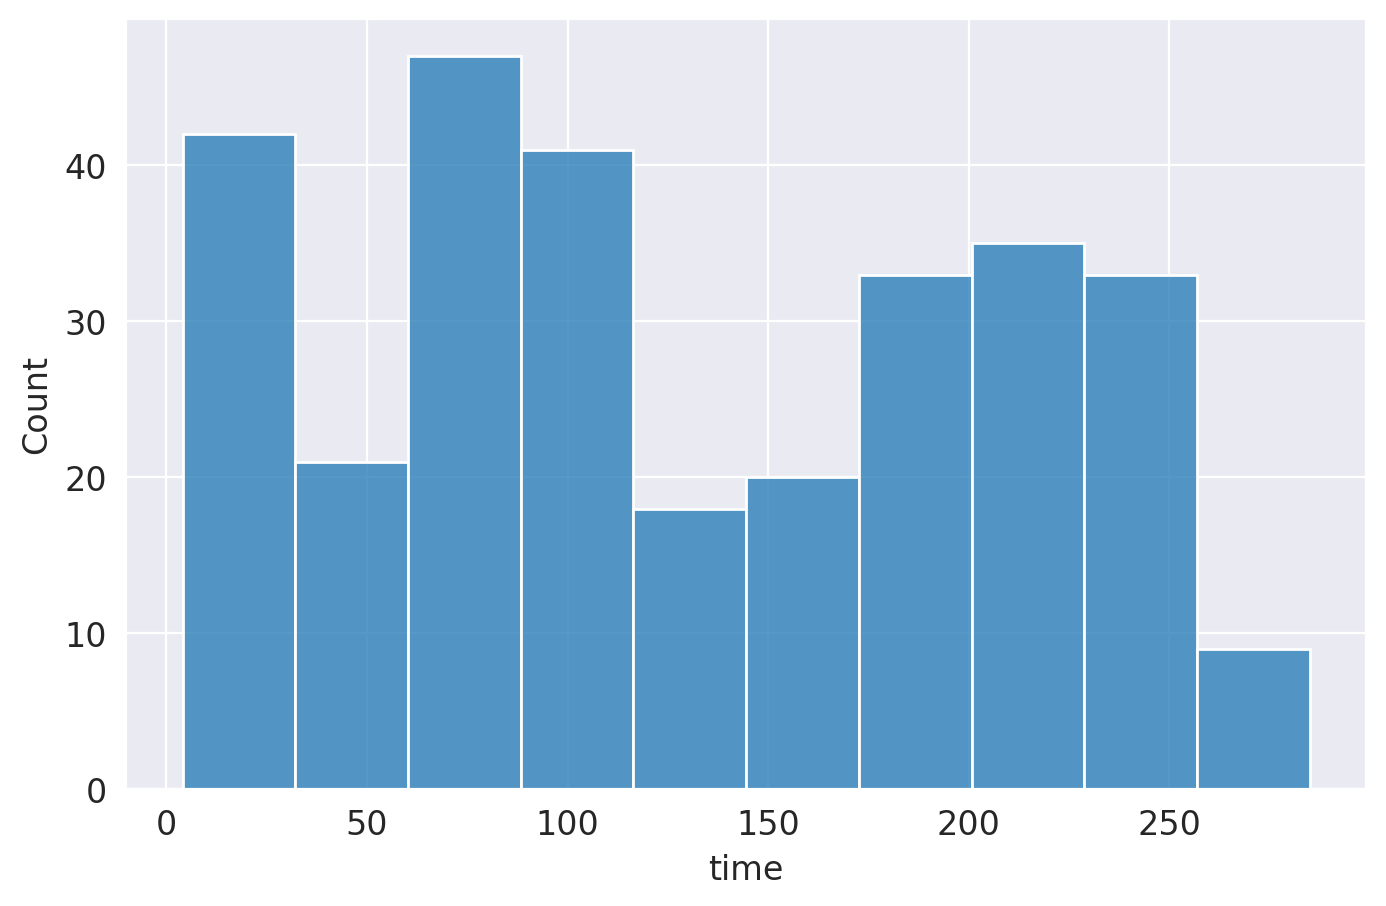

In [97]:
for col in df.columns[1:-1]:
    if col == 'sex':
        df.groupby('sex').sum()['age'].plot(kind='pie', autopct='%1.0f%%',
                                                  explode=(0.1,0),
                                                  startangle=90).set_ylabel('sex')
    elif col == 'smoking':
              df.groupby('smoking').sum()['age'].plot(kind='pie', autopct='%1.0f%%',
                                                  explode=(0.1,0),
                                                  startangle=90).set_ylabel('smoking')
    elif col == 'anaemia':
              df.groupby('anaemia').sum()['age'].plot(kind='pie', autopct='%1.0f%%',
                                                  explode=(0.1,0),
                                                  startangle=90).set_ylabel('anaemia')
    elif col == 'high_blood_pressure':
              df.groupby('high_blood_pressure').sum()['age'].plot(kind='pie', autopct='%1.0f%%',
                                                  explode=(0.1,0),
                                                  startangle=90).set_ylabel('high_blood_pressure')
    elif col == 'diabetes':
              df.groupby('diabetes').sum()['age'].plot(kind='pie', autopct='%1.0f%%',
                                                  explode=(0.1,0),
                                                  startangle=90).set_ylabel('diabetes')
    else:
      sns.histplot(data=df, x=col)

    plt.show()

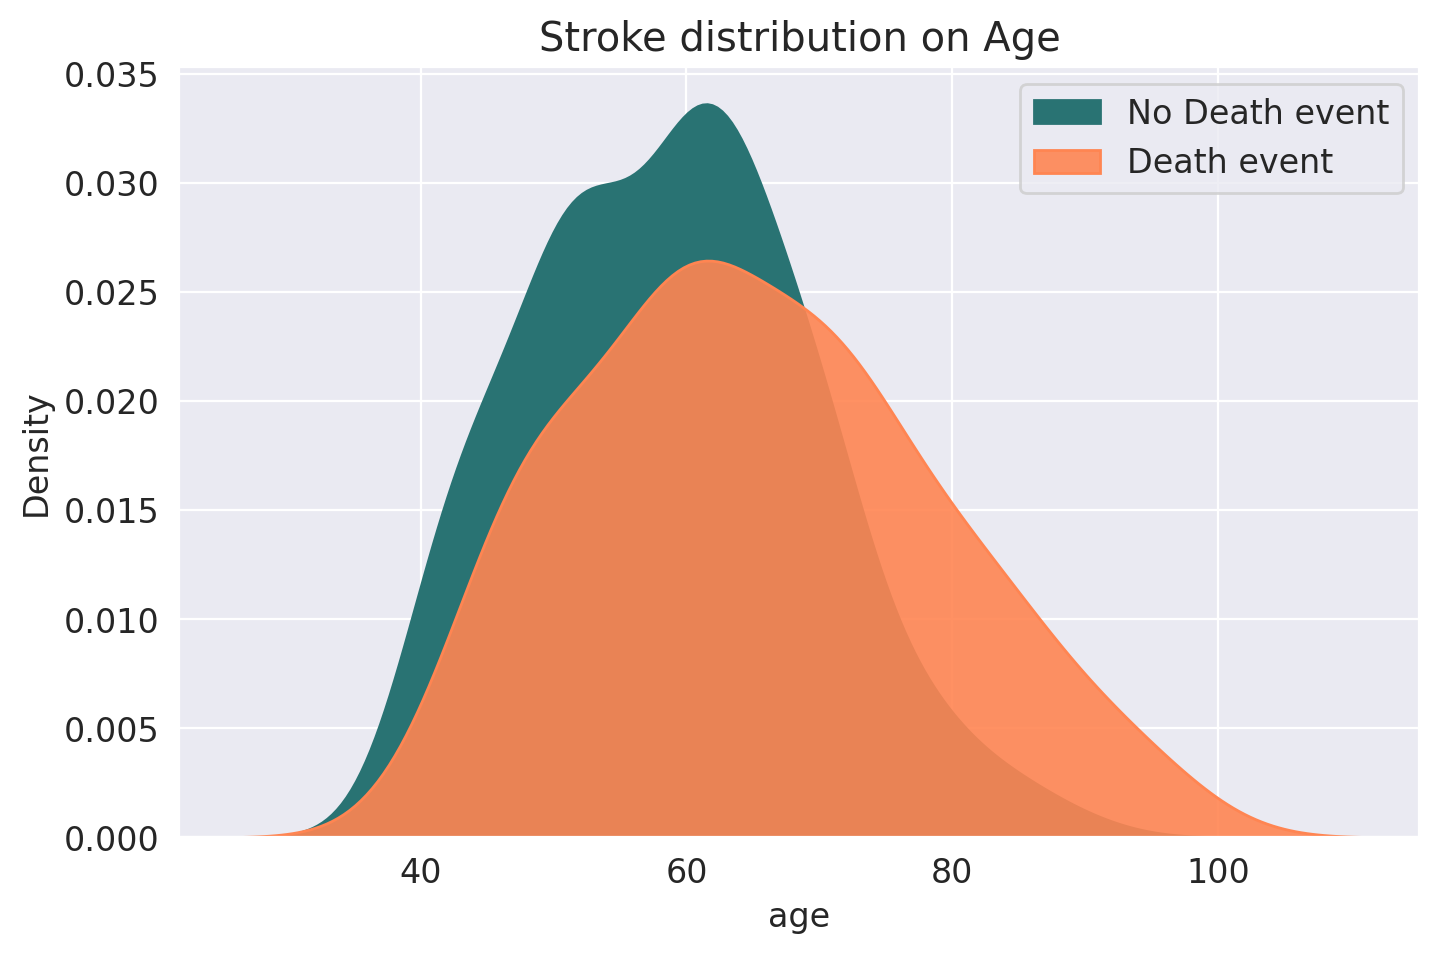

In [98]:
fig, ax = plt.subplots()
sns.kdeplot(data = df[df['DEATH_EVENT'] == 0],
            x='age', ax=ax, fill=True, alpha=1, color='#297373')

sns.kdeplot(data = df[df['DEATH_EVENT'] == 1],
            x='age', ax=ax, fill=True,  alpha=0.9, color='#FF8552')
ax.legend(['No Death event', 'Death event'])
plt.title("Stroke distribution on Age")
plt.show()

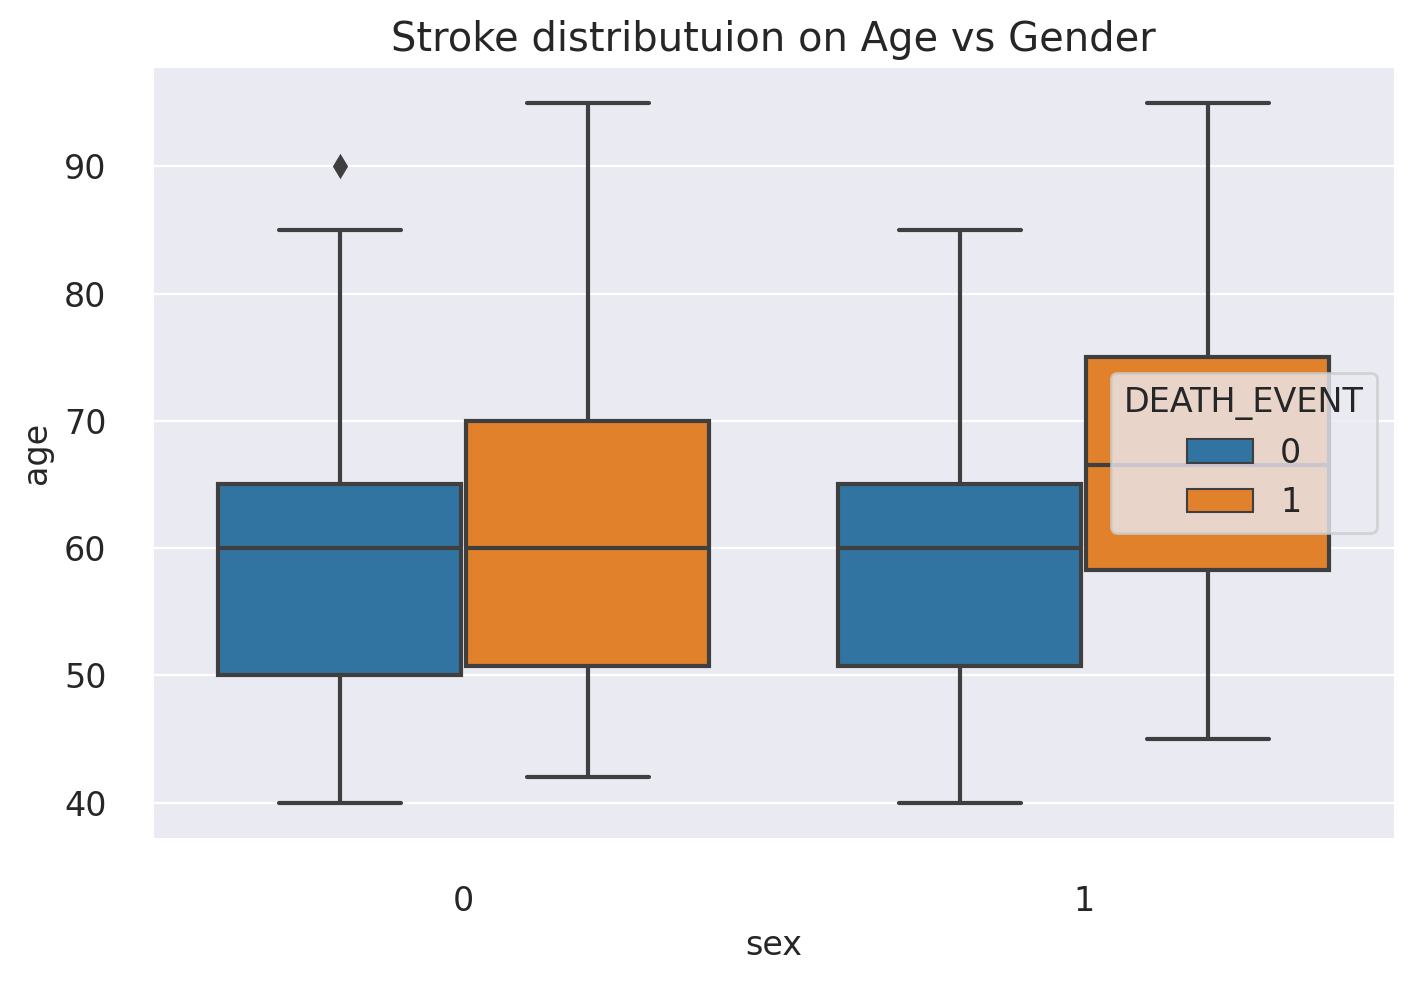

In [99]:
sns.boxplot(x="sex", y="age",
            hue="DEATH_EVENT",
            data=df)
sns.despine(offset=10, trim=True)
plt.title("Stroke distributuion on Age vs Gender")
plt.show()

### Correlation

<Axes: >

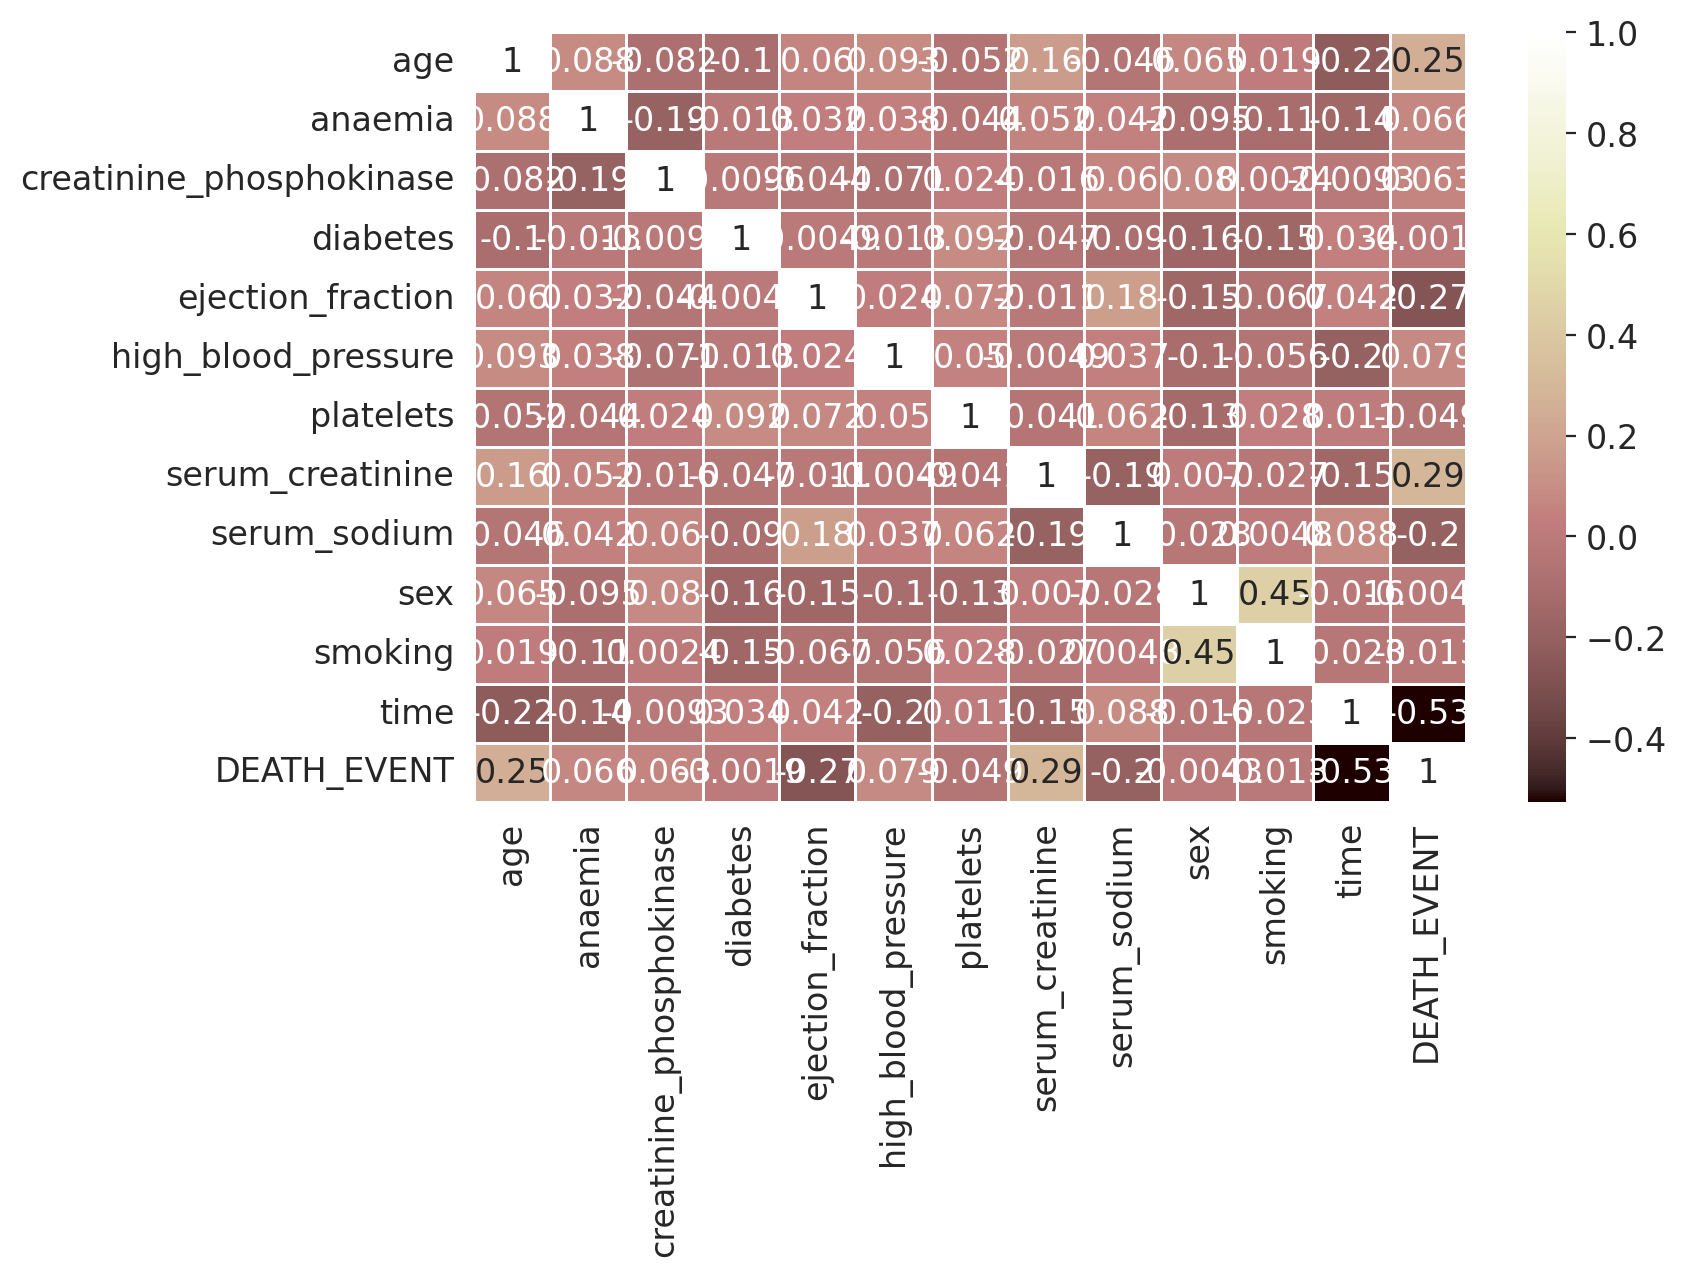

In [100]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="pink")

There are no highly correlated columns

## Models
Training Binary Classification Models & Evaluating their Performance


In [101]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

###1. LogisticRegression

In [102]:
models = [("LR", LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("DecisionTree", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier())]

In [103]:
lr = LogisticRegression()
cv = cross_validate(lr, X_train, y_train, cv=5, scoring=["accuracy", "f1", "recall", "precision"])

print(f'Accuracy: {cv["test_accuracy"].mean()} \nRecall: {cv["test_recall"].mean()} \nPrecision: {cv["test_precision"].mean()} \nF-Score: {cv["test_f1"].mean()}')

Accuracy: 0.7988385598141695 
Recall: 0.5505494505494506 
Precision: 0.7588245088245088 
F-Score: 0.6255708502024292


Let's find best hyperparameters and try model with them

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [0.1, 1, 10, 100],
              'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(lr, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


Doesn't seem to change anything

In [105]:
lr_best = LogisticRegression(C=10, penalty='l1', solver='liblinear')
cv = cross_validate(lr_best, X_train, y_train, cv=5, scoring=["accuracy", "f1", "recall", "precision"])

print(f'Accuracy: {cv["test_accuracy"].mean()} \nRecall: {cv["test_recall"].mean()} \nPrecision: {cv["test_precision"].mean()} \nF-Score: {cv["test_f1"].mean()}')

Accuracy: 0.8085946573751451 
Recall: 0.6406593406593406 
Precision: 0.7262515262515261 
F-Score: 0.6749879749879749


Let's see results on test X

In [106]:
lr_best.fit(X_train, y_train)
y_pred = lr_best.predict(X_train)
print(classification_report(y_train, y_pred))

y_pred = lr_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       142
           1       0.81      0.69      0.74        67

    accuracy                           0.85       209
   macro avg       0.83      0.80      0.82       209
weighted avg       0.84      0.85      0.84       209

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        61
           1       0.83      0.66      0.73        29

    accuracy                           0.84        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.84      0.84      0.84        90



The model's performance in terms of accuracy is good.  
Since we are looking to predict a medical diagnosis, it's important to have an very good Recall and Precision which this model has.

###2. KNeighborsClassifier

In [107]:
lr = KNeighborsClassifier()
cv = cross_validate(lr, X_train, y_train, cv=5, scoring=["accuracy", "f1", "recall", "precision"])

print(f'Accuracy: {cv["test_accuracy"].mean()} \nRecall: {cv["test_recall"].mean()} \nPrecision: {cv["test_precision"].mean()} \nF-Score: {cv["test_f1"].mean()}')

Accuracy: 0.6270615563298491 
Recall: 0.17802197802197803 
Precision: 0.3253968253968254 
F-Score: 0.22337989376352546


In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(lr, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [109]:
kn_best = KNeighborsClassifier(n_neighbors=8, weights='distance')
cv = cross_validate(kn_best, X_train, y_train, cv=5, scoring=["accuracy", "f1", "recall", "precision"])

print(f'Accuracy: {cv["test_accuracy"].mean()} \nRecall: {cv["test_recall"].mean()} \nPrecision: {cv["test_precision"].mean()} \nF-Score: {cv["test_f1"].mean()}')

Accuracy: 0.569918699186992 
Recall: 0.16483516483516486 
Precision: 0.32352941176470584 
F-Score: 0.20889766380628258


In [110]:
kn_best.fit(X_train, y_train)
y_pred = kn_best.predict(X_train)
print(classification_report(y_train, y_pred))

y_pred = kn_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        67

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209

              precision    recall  f1-score   support

           0       0.72      0.84      0.77        61
           1       0.47      0.31      0.38        29

    accuracy                           0.67        90
   macro avg       0.60      0.57      0.57        90
weighted avg       0.64      0.67      0.64        90



The model is overfitting on the train set, and it's performance on the test set is poor. The high accuracy and low F1 suggests that it's predicting more of one class which is the majority class in this case.
Low true positives and high false negatives resulted in the poor results for the precision, recall and F1.

###3. DecisionTreeClassifier

In [111]:
dc = DecisionTreeClassifier()
cv = cross_validate(dc, X_train, y_train, cv=5, scoring=["accuracy", "f1", "recall", "precision"])

print(f'Accuracy: {cv["test_accuracy"].mean()} \nRecall: {cv["test_recall"].mean()} \nPrecision: {cv["test_precision"].mean()} \nF-Score: {cv["test_f1"].mean()}')

Accuracy: 0.751219512195122 
Recall: 0.5956043956043956 
Precision: 0.6412394957983193 
F-Score: 0.6038308956121018


In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dc, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [113]:
dc_best = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2)
cv = cross_validate(dc_best, X_train, y_train, cv=5, scoring=["accuracy", "f1", "recall", "precision"])

print(f'Accuracy: {cv["test_accuracy"].mean()} \nRecall: {cv["test_recall"].mean()} \nPrecision: {cv["test_precision"].mean()} \nF-Score: {cv["test_f1"].mean()}')

Accuracy: 0.7849012775842044 
Recall: 0.6142857142857143 
Precision: 0.6915501165501166 
F-Score: 0.6435720601237843


In [114]:
dc_best.fit(X_train, y_train)
y_pred = dc_best.predict(X_train)
print(classification_report(y_train, y_pred))

y_pred = dc_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       142
           1       0.89      0.76      0.82        67

    accuracy                           0.89       209
   macro avg       0.89      0.86      0.87       209
weighted avg       0.89      0.89      0.89       209

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        61
           1       0.71      0.59      0.64        29

    accuracy                           0.79        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.78      0.79      0.78        90



The best model so far!

###4. RandomForestClassifier

In [115]:
rf = RandomForestClassifier()
cv = cross_validate(rf, X_train, y_train, cv=5, scoring=["accuracy", "f1", "recall", "precision"])

print(f'Accuracy: {cv["test_accuracy"].mean()} \nRecall: {cv["test_recall"].mean()} \nPrecision: {cv["test_precision"].mean()} \nF-Score: {cv["test_f1"].mean()}')

Accuracy: 0.8469221835075494 
Recall: 0.7307692307692307 
Precision: 0.8016483516483517 
F-Score: 0.7512820512820513


In [116]:
param_grid = {'n_estimators': [50, 100],
              'max_depth': [None, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
             'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [117]:
rf_best = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5, max_features='log2', n_estimators=50)
cv = cross_validate(rf_best, X_train, y_train, cv=5, scoring=["accuracy", "f1", "recall", "precision"])

print(f'Accuracy: {cv["test_accuracy"].mean()} \nRecall: {cv["test_recall"].mean()} \nPrecision: {cv["test_precision"].mean()} \nF-Score: {cv["test_f1"].mean()}')

Accuracy: 0.8325203252032519 
Recall: 0.6263736263736265 
Precision: 0.8337662337662337 
F-Score: 0.7044193091424213


In [118]:
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_train)
print(classification_report(y_train, y_pred))

y_pred = rf_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       142
           1       0.98      0.90      0.94        67

    accuracy                           0.96       209
   macro avg       0.97      0.94      0.95       209
weighted avg       0.96      0.96      0.96       209

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        61
           1       0.74      0.59      0.65        29

    accuracy                           0.80        90
   macro avg       0.78      0.74      0.76        90
weighted avg       0.79      0.80      0.79        90



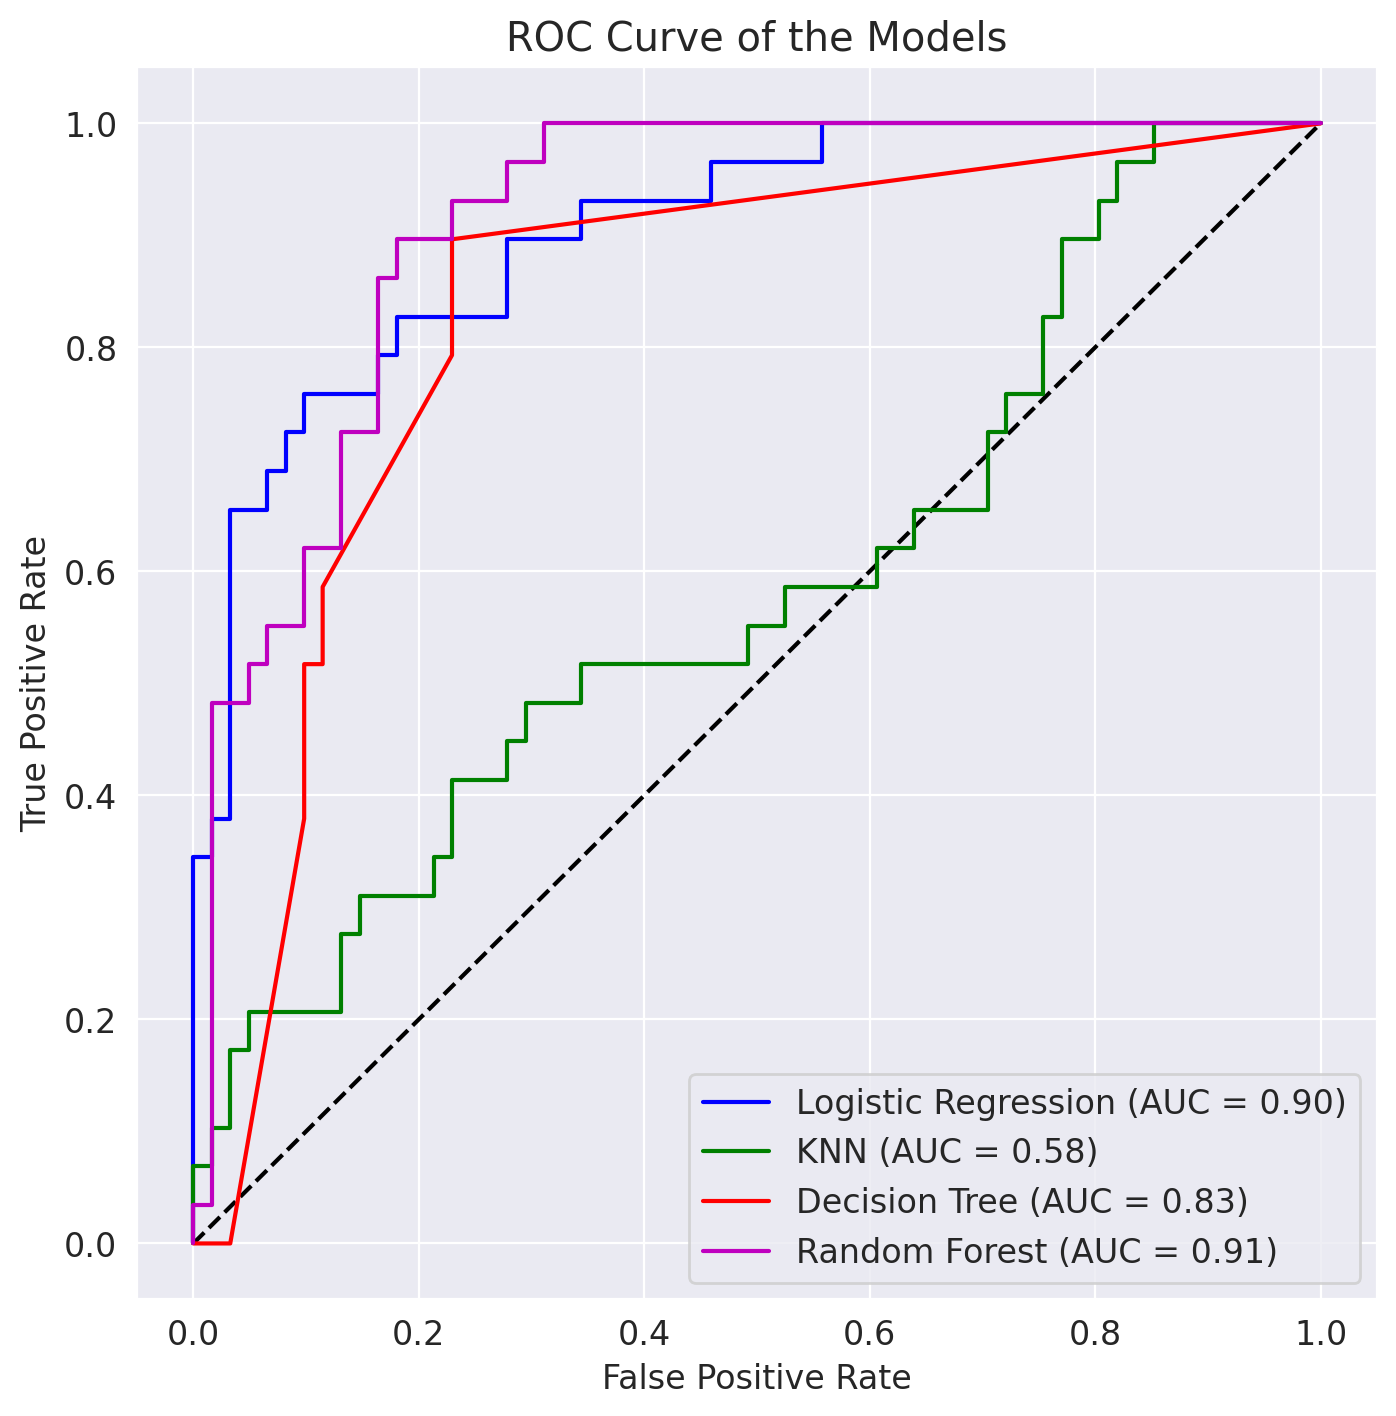

In [119]:
from sklearn.metrics import auc, roc_auc_score, confusion_matrix, roc_curve, classification_report

models = [lr_best, kn_best, dc_best, rf_best]
colors = ['b', 'g', 'r', 'm']
labels = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')

for i in range(len(models)):
    y_pred_prob = models[i].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label='%s (AUC = %0.2f)' % (labels[i], roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Models')
plt.legend(loc="lower right")
plt.show()
